In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
df=pd.read_csv('regression_train.txt')
df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [70]:
df.dtypes

data1       int64
data2       int64
data3      object
data4     float64
data5     float64
data6     float64
data7     float64
data8     float64
data9      object
data10     object
output    float64
dtype: object

In [71]:
df.duplicated().any()

False

In [72]:
df.shape

(10000, 11)

In [73]:
df.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [74]:
df=df.dropna()
df.shape

(9997, 11)

In [75]:
corr=df.corr()
corr

,data1,data2,data4,data5,data6,data7,data8,output
data1,1.000000,0.008367,0.007462,-0.022798,-0.002956,-0.000312,-0.008111,0.185512
data2,0.008367,1.000000,0.019126,0.017404,0.010093,-0.013187,0.013590,0.867934
data4,0.007462,0.019126,1.000000,0.006372,0.000550,0.018160,-0.003601,0.406264
data5,-0.022798,0.017404,0.006372,1.000000,0.005740,0.009529,0.009352,0.015382
data6,-0.002956,0.010093,0.000550,0.005740,1.000000,-0.020063,-0.001605,-0.009857
data7,-0.000312,-0.013187,0.018160,0.009529,-0.020063,1.000000,-0.009449,0.212525
data8,-0.008111,0.013590,-0.003601,0.009352,-0.001605,-0.009449,1.000000,0.008164
output,0.185512,0.867934,0.406264,0.015382,-0.009857,0.212525,0.008164,1.000000


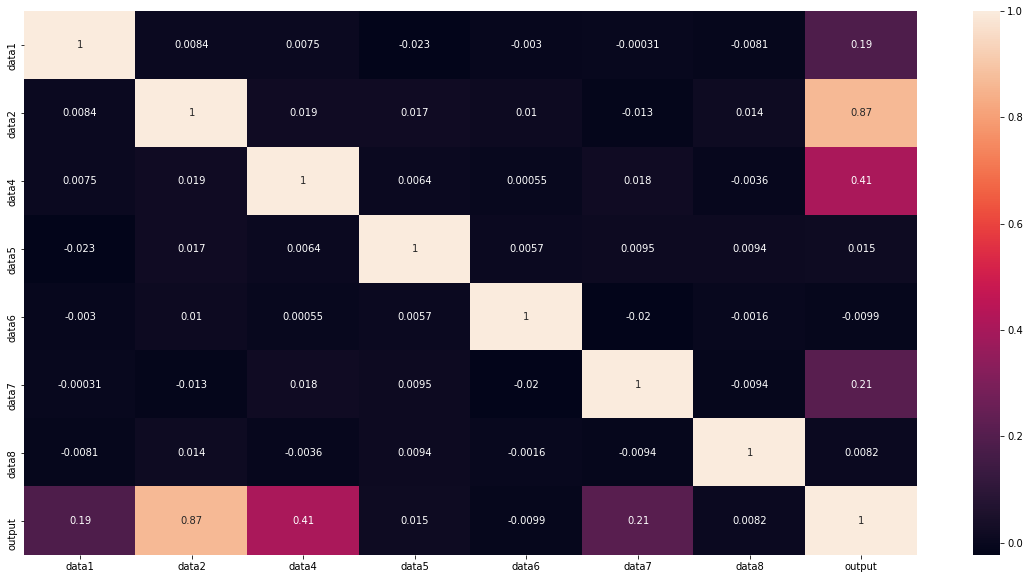

In [76]:
plt.figure(figsize=(20,10),facecolor='w')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [78]:
df=pd.get_dummies(df,columns=['data3','data6','data8','data9','data10'])
df.head()


,data1,data2,data4,data5,data7,output,data3_A,data3_B,data3_C,data3_D,data3_E,data3_F,data3_G,data3_H,data6_0.0,data6_1.0,data8_0.0,data8_1.0,data8_2.0,data9_F,data9_M,data10_p
0,8,279,14.451155,1139.0,9.302908,86.108947,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1
1,1,108,14.207448,1656.0,7.220130,42.606833,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
2,8,258,19.220830,2817.0,8.727214,85.625961,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
3,4,147,15.752732,1948.0,6.078818,53.656277,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
4,5,230,10.195407,1336.0,4.749185,64.925051,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1


In [79]:
X=df.drop('output',axis=1)
y=df['output']

In [80]:
X_train.shape,y_train.shape

((6498, 21), (6498,))

In [81]:
clf=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
mean_squared_error(y_test,predictions)

1.6378781638243405

In [82]:
predictions

array([40.96530808, 85.52904216, 50.12580865, ..., 43.39520572,
       61.212411  , 68.92485454])

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=20,n_repeats=5,random_state=1)
grid=dict()
grid['alpha']=np.arange(0,1,0.1)
ridge=Ridge()
ridge_reg=GridSearchCV(ridge,grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
ridge_reg.fit(X,y)

In [85]:
ridge_pred=ridge_reg.predict(X_test)
print('r2_score of RIDGE REGREESOR :',r2_score(y_test,ridge_pred)*100)
print('mean square error',mean_squared_error(y_test,ridge_pred))

r2_score of RIDGE REGREESOR : 99.4569450760594
mean square error 0.986240795076092


In [86]:
test=pd.read_csv('regression_test.txt')
test

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p
...,...,...,...,...,...,...,...,...,...,...
9995,7,251,D,23.004384,1637,0,8.333728,1,F,p
9996,5,275,A,29.514058,2339,0,9.953107,1,F,p
9997,8,168,C,22.520965,1827,0,7.555553,1,F,p
9998,4,296,E,16.558948,1748,0,8.846995,1,F,p


In [89]:
test.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
dtype: int64

In [90]:
test.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [91]:
test.dtypes

data1       int64
data2       int64
data3      object
data4     float64
data5       int64
data6       int64
data7     float64
data8       int64
data9      object
data10     object
dtype: object

In [92]:
_test=pd.get_dummies(test,columns=['data3','data6','data8','data9','data10'])
_test.head()

,data1,data2,data4,data5,data7,data3_A,data3_B,data3_C,data3_D,data3_E,data3_F,data3_G,data3_H,data6_0,data6_1,data8_0,data8_1,data8_2,data9_F,data9_M,data10_p
0,7,195,29.038043,2725,6.145731,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,9,109,20.221431,1184,9.334184,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
2,0,126,26.477532,2975,9.021806,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1
3,2,209,13.445450,1067,1.814993,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1
4,5,268,25.065894,1336,1.639130,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1


In [93]:
new=clf.predict(_test)

In [97]:
Final_data=pd.read_csv('regression_test.txt')
Final_data['outputt']=new
Final_data.to_excel('linear_reg.xls',index=False)
newdatapredicted=pd.read_excel('linear_reg.xls')
newdatapredicted

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,outputt
0,7,195,A,29.038043,2725,1,6.145731,2,M,p,76.987698
1,9,109,F,20.221431,1184,1,9.334184,2,M,p,56.419112
2,0,126,C,26.477532,2975,1,9.021806,1,M,p,59.826683
3,2,209,E,13.445450,1067,1,1.814993,0,M,p,58.876364
4,5,268,B,25.065894,1336,1,1.639130,1,M,p,82.154285
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,251,D,23.004384,1637,0,8.333728,1,F,p,85.486313
9996,5,275,A,29.514058,2339,0,9.953107,1,F,p,96.518342
9997,8,168,C,22.520965,1827,0,7.555553,1,F,p,68.295847
9998,4,296,E,16.558948,1748,0,8.846995,1,F,p,87.733531
